In [1]:
# The Image Brightness Detection.
#
# References:
# http://alienryderflex.com/hsp.html
# https://www.whydomath.org/node/wavlets/imagebasics.html
#
# We say the above formula for y is a convex combination of r', g',
# and b' since the multipliers .299, .587, and .114 are non-negative and sum to one. Actually, this is exactly the
# formula suggested by the National Television System Committee (NTSC) for converting color feeds to black and white
# televisions sets.
#
# Notes:
# Develop a generalized algorithm to detect the brightness of any image. Your algorithm should take an image
# as input and give a score between (0-10) as output (zero being low bright and 10 being high bright).
#
#
# See the README file for information on usage.

import math
import sys
from pathlib import Path
import argparse

import numpy as np
from PIL import Image, ImageStat

import imageio
import numpy as np
import cv2

from matplotlib import pyplot as plt

In [2]:
class ImageBrightnessDetect(object):
    """
    Input: Input RGB image file path
    Output: Level of brightness 1 to 10 (0 being low and 10 being the brightest)
    """

   
        # File existence check
#         my_file = Path(self.__image_path)
#         if my_file.is_file():
#             image = Image.open(self.__image_path)
#             image.resize((1280, 720), Image.ANTIALIAS)
#             return self.__calculate_level(image)
#         else:
#             return "File does not exist"
#        image=self.__image_path
#        return self.__calculate_level(image)

    @staticmethod
    def calculate_level(image):
        # Creating bins for 10 levels between 0 to 255
  
        levels = np.linspace(0, 255, num=10)

        # Get average pixel level for each layer
        #image_stats = ImageStat.Stat(image)
        #red_channel_mean, green_channel_mean, blue_channel_mean = image_stats.mean
        
        red_channel_mean   = image[:,:,0].mean()
        green_channel_mean = image[:,:,1].mean()
        blue_channel_mean = image[:,:,2].mean()
        
        # The three constants (.299, .587, and .114) represent the different degrees to which each of the primary (RGB)
        # colors affects human perception of the overall brightness of a color.  Notice that they sum to 1.

        image_bright_value = math.sqrt(0.299 * (red_channel_mean ** 2)
                                       + 0.587 * (green_channel_mean ** 2)
                                       + 0.114 * (blue_channel_mean ** 2))

        image_bright_level = np.digitize(image_bright_value, levels, right=True)

        return image_bright_value,image_bright_level


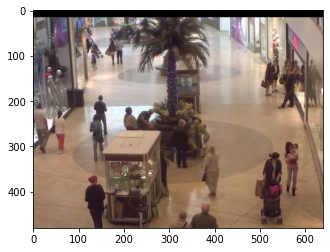

In [3]:
img = cv2.imread('seq_000001.jpg')
img2 = img[:,:,::-1]
plt.imshow(img2)

In [13]:
#### simple averaging method

f = imageio.imread("seq_000001.jpg", as_gray=True)

def img_estim(img, thrshld):
    is_light = np.mean(img) > thrshld
    return 'light' if is_light else 'dark'

print(img_estim(f, 110))
print(np.mean(img))

light
148.8846740386445


In [11]:
## HSV method

imagePath="seq_000001.jpg"
actual_Value, Score = ImageBrightnessDetect(imagePath).classify()
print(actual_Value)
print(Score)

119.47245179632377
5


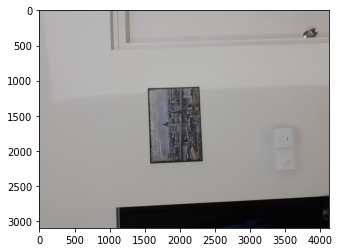

In [6]:
img = cv2.imread('Bright3.jpg')
img2 = img[:,:,::-1]
plt.imshow(img2)

In [9]:
#### simple averaging method

f = imageio.imread("Bright3.jpg", as_gray=True)

def img_estim(img, thrshld):
    is_light = np.mean(img) > thrshld
    return 'light' if is_light else 'dark'

print(img_estim(f, 110))
print(np.mean(img))

light
148.8846740386445


In [10]:
## HSV method

imagePath="Bright3.jpg"
actual_Value, Score = ImageBrightnessDetect(imagePath).classify()
print(actual_Value)
print(Score)

149.1975805882349
6


In [3]:
#### Live video



cap = cv2.VideoCapture(0)

i = 1
while(i<1000):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #gray = cv2.cvtColor(frame)
    
    actual_Value, Score = ImageBrightnessDetect().calculate_level(frame)
    
    
    if Score < 5:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,'Dim light detected',(1,250), font, 2,(255,255,255),2,cv2.LINE_AA)
        cv2.putText(frame,'score :'+str(Score),(5,350), font, 2,(255,255,255),2,cv2.LINE_AA)
        
    else:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,'Bright light detected',(1,250), font, 2,(255,255,255),2,cv2.LINE_AA)
        cv2.putText(frame,'score :'+str(Score),(5,350), font, 2,(255,255,255),2,cv2.LINE_AA)
        
    cv2.putText(frame,"Brightness Level : "+str(np.round(actual_Value)),(10,500), font, 2,(255,255,255),2,cv2.LINE_AA)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    
    #cv2.imshow('frame')
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    print(i)
    i = i+1

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
cap.release()
cv2.destroyAllWindows()